# <font color= 'blue'> Project: High Value Customer Identification (Insiders)</font>


**Business Challange**

A loyalty program of customers to increase sales frquency.

**Business Planning (IOT)**

**<font color= 'green'>Input**</font>

**1. Business Problem**
- Select the most valuable customers to join a loyalty program.

**2. Dataset**
    
<u>One year e-commerce sales.</u>
    
   - Invoice No: Invoice number (A 6-digit integral number uniquely assigned to each transaction)

   - Stock Code: Product (item) code

   - Description: Product (item) name

   - Quantity: The quantities of each product (item) per transaction

   - Invoice Date: The day when each transaction was generated

   - Unit Price: Unit price (Product price per unit)

   - Customer ID: Customer number (Unique ID assigned to each customer)
    
   - Country: Country name (The name of the country where each customer resides)
    
**<font color= 'green'>Output**</font>
- **1.** <u>Indicate customers who will be part of a loyalty program called Insiders.</u>
     - List: client_id | is_insider
             10323 |   yes
             32413 |   no
- **2.**<u> A report with the answers for the business questions.</u>
    - Who are the customers eligible to join the program?
    - How many customers will be part os this group?
    - What are the main characteristics of these customers?
    - What is the contribution percentage revenue from Insiders?
    - What is the group's revenue expectation for the coming months?
    - What are the condictions for select customers to join Insiders?
    - What are the condictions for removing Insiders customers?
    - What is the guarantee that the Insiders program is better than the rest of the base?
    - What actions can the marketing team take to increase revenue?
    
**<font color= 'green'>Taks**</font>
- <u>**1.** Who are the customers eligible to join the program?</u>
  - What does it mean, to be elegible? What does high-value customers mean?
  - Revenue: ticket, bascket size, high LTV (Lifetime Value), churn probability,high TVC prevision, purchasing propensity.
  - Cost: lower return rate.
  - Purchase experience: high average evaluation rate.
     
- <u>**2.** How many customers will be part os this group?</u>
  - Total nambers of customers.
  - % Insiders group.
        
- <u>**3.** What are the main characteristics of these customers?</u>
  - Age
  - Location
  - Others characteristics.
  - Ticket, bascket size, high LTV, churn probability,high TVC prevision, purchasing propensity.
       
        
- <u>**4.** What is the contribution percentage revenue from Insiders?</u>
   - Total revenue for the year.
   - Insiders group revenue.
         
- <u>**5.** What is the group's revenue expectation for the coming months?</u>
  - LTV Insisders group.
  - Cohort analysis.
        
- <u>**6.** What are the condictions for select customers to join Insiders?</u>
  - Define the periodicity
  - The person needs to have similar characteristics with someone in the group.
    
- <u>**7.** What are the condictions for removing Insiders customers?</u>
  - Define the periodicity
  - The person doen't need to have similar characteristics with someone in the group.
        
- <u>**8.** What is the guarantee that the Insiders program is better than the rest of the base?</u>
  - A/B test
  - A/B bayesian test
  - Hypothesis test
        
- <u>**9.** What actions can the marketing team take to increase revenue?</u>
  - Discont
  - Purchase preference
  - Purchase shipping
  - Company visit  
        
**<font color= 'green'>Benchmark Solutions**</font>

- **Desk Research**
   - RFM model (recency, frequency,, monetary): sorted data to have a RFM Score.
   - Recency: How recently a customer has made a purchase
   - Frequency: How often a customer makes a purchase
   - Monetary Value: How much money a customer spends on purchases
     
- <u>example project:</u> https://guillaume-martin.github.io/rfm-segmentation-with-python.html

In [ ]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import umap.umap_ as umap

from sklearn.manifold import TSNE
from sklearn          import cluster       as c
from sklearn          import metrics       as m
from sklearn          import mixture       as mx
from sklearn          import ensemble      as en
from sklearn          import preprocessing as pp
from sklearn          import decomposition as dd
from plotly           import express       as px
from matplotlib       import pyplot        as plt
from scipy.cluster    import hierarchy     as hc

from datetime            import datetime
from pandas_profiling    import ProfileReport
from IPython.display     import Image, HTML
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors

# 0.0. Imports

In [1]:
import re
import numpy   as np
import pandas  as pd
import seaborn as sns

import umap.umap_ as umap

from matplotlib import pyplot as plt

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import ensemble      as en
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold      as mn
from sklearn import mixture       as mx
from IPython.display import Image, HTML
from plotly import express as px
from scipy.cluster import hierarchy as hc
from sqlalchemy import create_engine

## 0.2. Load dataset

In [2]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings() 
    

Populating the interactive namespace from numpy and matplotlib


In [3]:
# load data
df_raw = pd.read_csv('/Users/anaotavio/Documents/repos/insiders_clustering//data/Ecommerce.csv')

# drop extra column
df_raw = df_raw.drop(columns = ['Unnamed: 8'], axis = 1)

## 0.1. Helper Functions

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [5]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 541909
Number of Columns: 8


## 1.3. Data types

In [7]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [8]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [9]:
df_missing = df1.loc[df1['customer_id'].isna(),:]
df_not_missing = df1.loc[~df1['customer_id'].isna(),:]

In [10]:
# create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

# merge original with reference dataframe
df1 = pd.merge(df1, df_backup, on = 'invoice_no', how= 'left')

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# drop extra columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'], axis=1)
   
df1.head()    


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [11]:
# No NaN in 'customer_id'
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6. Change dtypes

In [12]:
# invoice_date
df1["invoice_date"] = pd.to_datetime(df1["invoice_date"],infer_datetime_format=True)

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7. Descriptive Statistics

In [13]:
num_attributes = df1.select_dtypes(include =['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [14]:
 # central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m1 = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### 1.7.1.1. Numerical Attributes - Investigating

1. Could be negative quantity, return?
2. Unit price = 0. Could it be sales?


### 1.7.2. Categorical Attributes

#### Invoice number

In [15]:
#cat_attributes['invoice_no'].astype(int)  -> Data contains 'invoice_no' with numbers and letters.
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search( '[^0-9]+', x ))), :]
len(df_letter_invoices)

print('Total number of invoices:{}'.format(len(df_letter_invoices)))
print('Total number os negative quantity:{}'.format(len(df_letter_invoices[df_letter_invoices['quantity']< 0])))

Total number of invoices:9291
Total number os negative quantity:9288


#### Stock Code

In [16]:
# check stock codes only characters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Action:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [17]:
# Action: Delete description

#### Country

In [18]:
len(df1['country'].unique())

38

In [19]:
df1['country'].value_counts(normalize = True).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [20]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending = False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# 2.0. Data Filtering

In [21]:
df2 = df1.copy()

In [22]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [23]:
# === Numerical attributes ====
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# === Categorical attributes ====
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ]

# description
df2 = df2.drop( columns='description', axis=1 )

# map -  
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

# bad users - outlier
df2 = df2[~df2['customer_id'].isin( [16446] )]

# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchase = df2.loc[df1['quantity'] >= 0, :]

# 3.0. Feature Engineering

In [24]:
df3 = df2.copy()

In [25]:
# Feature Ideas:
## 1) Moving Average - 7d, 14d, 30d
## 2) Purchase quantity by month, before the 15th and after the 15th.
## 3) Average Financial

## 3.1. Feature Creation

In [26]:
# data reference
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'],
                   axis =1 ).drop_duplicates( ignore_index = True)

In [27]:
df_ref.shape

(5786, 1)

### 3.1.1. Gross Revenue

In [28]:
# Gross Revenue
df2_purchase.loc[:,'gross_revenue'] = df2_purchase.loc[:,'quantity'] * df2_purchase.loc[:,'unit_price']

# Monetary
df_monetary = df2_purchase.loc[:,['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')
df_ref.isna().sum()

/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2. Recency - Day from last purchase

In [29]:
 # Recency - Last day purchase
df_recency = df2_purchase.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.5. Quantity of products purchased

In [30]:
df_freq = (df2_purchase.loc[:,['customer_id', 'stock_code']].groupby('customer_id')
                                                        .count()
                                                        .reset_index()
                                                        .rename(columns={'stock_code': 'quantity_products'}))
                                                        
                                                        
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how ='left')
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_products    91
dtype: int64

### 3.1.8. Frequency Purchase

In [31]:
df_aux = ( df2_purchase[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_products    91
frequency            91
dtype: int64

### 3.1.9. Number of Returns

In [32]:
df2_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [33]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'quantity_returns'} )
df_returns['quantity_returns'] = df_returns['quantity_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['quantity_returns'].isna(), 'quantity_returns'] = 0

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_products    91
frequency            91
quantity_returns      0
dtype: int64

# 4.0. Exploratory Data Analysis (EDA)

In [34]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id          0
gross_revenue        0
recency_days         0
quantity_products    0
frequency            0
quantity_returns     0
dtype: int64

## 4.1. Univariate Analysis

**Notes.01**
1) What do we look for in a clustering problem?
- Cohesive and separate cluster.
- Variability
    - Metrics:
        - Min, max, range (dispersion).
        - Mean and Median.
        - Standard deviation( std) and variance.
        - Coefficient of variation (CV) = std/mean
Obs: The cluster type differs with each type of business problem.

**Explore/Delete**

**1.** Gross Revenue - ok


In [35]:
#profile = ProfileReport(df4)
#profile.to_file('output_v2.html')

# to visualize: file:///Users/anaotavio/Documents/repos/insiders_clustering/output/output_v2.html

### 4.1.1. Gross Revenue/Quantity of Items

In [36]:
# outlier?
df4[df4['customer_id']==14646]

,customer_id,gross_revenue,recency_days,quantity_products,frequency,quantity_returns
1017,14646,279138.02,1.0,2060.0,0.20339,288.0


In [37]:
df3[df3['customer_id']==14646].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
319805,C564899,22956,-144,2017-08-29,1.85,Netherlands,14646
319806,C564899,21787,-144,2017-08-29,0.65,Netherlands,14646
271584,560710,22567,1,2017-07-18,1.45,Netherlands,14646
295508,562789,23359,1,2017-08-07,1.95,Netherlands,14646
295507,562789,23360,1,2017-08-07,1.95,Netherlands,14646


### 4.1.2. Quantity of Products

In [38]:
# outlier?
df4[df4['quantity_products']==7838]

,customer_id,gross_revenue,recency_days,quantity_products,frequency,quantity_returns
68,17841,40967.72,1.0,7838.0,0.33244,203.0


In [39]:
df3[df3['customer_id']==17841].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
278383,C561210,23263,-10,2017-07-23,1.25,United Kingdom,17841
494925,C578280,22339,-7,2017-11-21,0.19,United Kingdom,17841
484964,C577547,23148,-7,2017-11-18,0.83,United Kingdom,17841
440248,C574524,22893,-6,2017-11-02,0.42,United Kingdom,17841
406915,C571838,23322,-5,2017-10-17,2.95,United Kingdom,17841


### 4.1.4. Frequecy

In [40]:
df4[df4['frequency']==17]

,customer_id,gross_revenue,recency_days,quantity_products,frequency,quantity_returns
0,17850,5391.21,372.0,297.0,17.0,40.0


In [41]:
df3[df3['customer_id']==17850].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
86895,C543611,82494L,-12,2017-02-08,2.55,United Kingdom,17850
86896,C543611,21071,-6,2017-02-08,1.06,United Kingdom,17850
86889,C543611,22632,-6,2017-02-08,1.85,United Kingdom,17850
86902,C543611,21169,-2,2017-02-08,1.45,United Kingdom,17850
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850


## 4.2. Bivariate Analysis

In [42]:
cols = ['customer_id']
df42 = df4.drop(cols, axis=1)

In [43]:
df42.columns

Index(['gross_revenue', 'recency_days', 'quantity_products', 'frequency',
       'quantity_returns'],
      dtype='object')

## 4.3 Space Study

1. PCA : axis variability reduction
2. UMAP: variability reduction via Baysean system   
3. t-SNE: 
4. Decision Tree:

In [44]:
# original dataset
#df43 = df4.drop(columns = ['customer_id'], axis=1).copy()

# selected dataset
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'quantity_products', 'frequency', 'quantity_returns']
df43 = df4[ cols_selected ].drop( columns='customer_id', axis=1 )

In [45]:
df43.shape

(5695, 5)

In [46]:
# MinMax Scaler
# from sklearn import prepocessing as pp
mm = pp.MinMaxScaler()

df43['gross_revenue']     = mm.fit_transform( df43[['gross_revenue']] )
df43['recency_days']      = mm.fit_transform( df43[['recency_days']] )
df43['quantity_products'] = mm.fit_transform( df43[['quantity_products']])
df43['frequency']         = mm.fit_transform( df43[['frequency']])
df43['quantity_returns']  = mm.fit_transform( df43[['quantity_returns']])

X = df43.copy()

### 4.3.1 PCA

In [47]:
#from sklearn import decomposition as dd

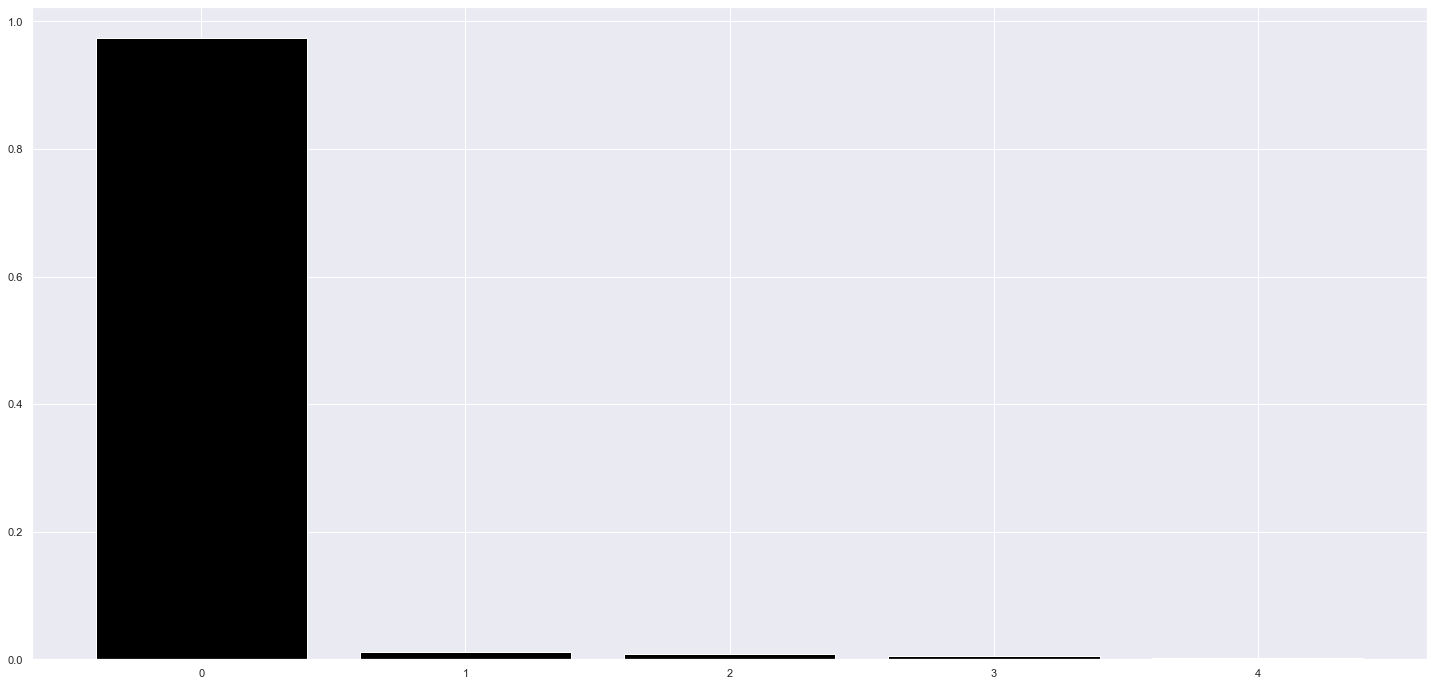

In [48]:
pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

# plot explained variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_, color='black' )

# pca component
df_pca = pd.DataFrame( principal_components )

<AxesSubplot:xlabel='0', ylabel='1'>

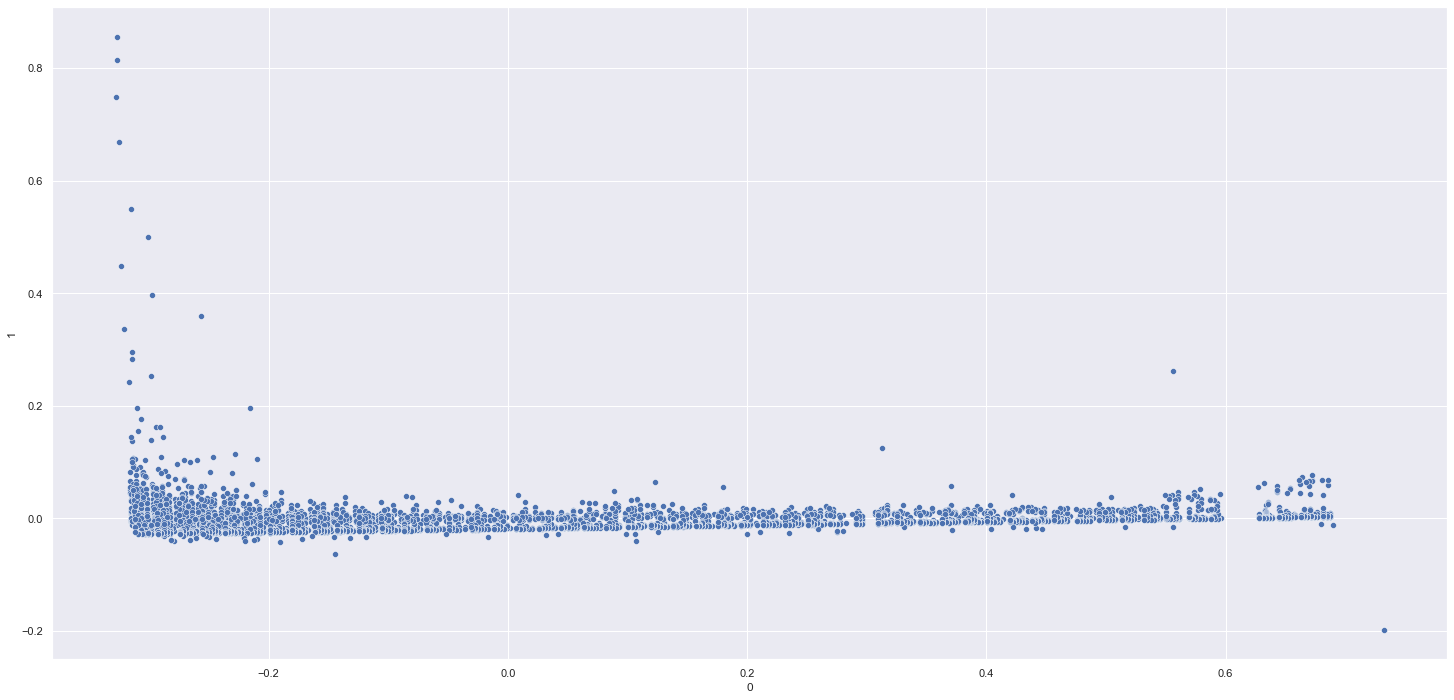

In [49]:
sns.scatterplot(x= 0, y=1, data=df_pca)

### 4.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

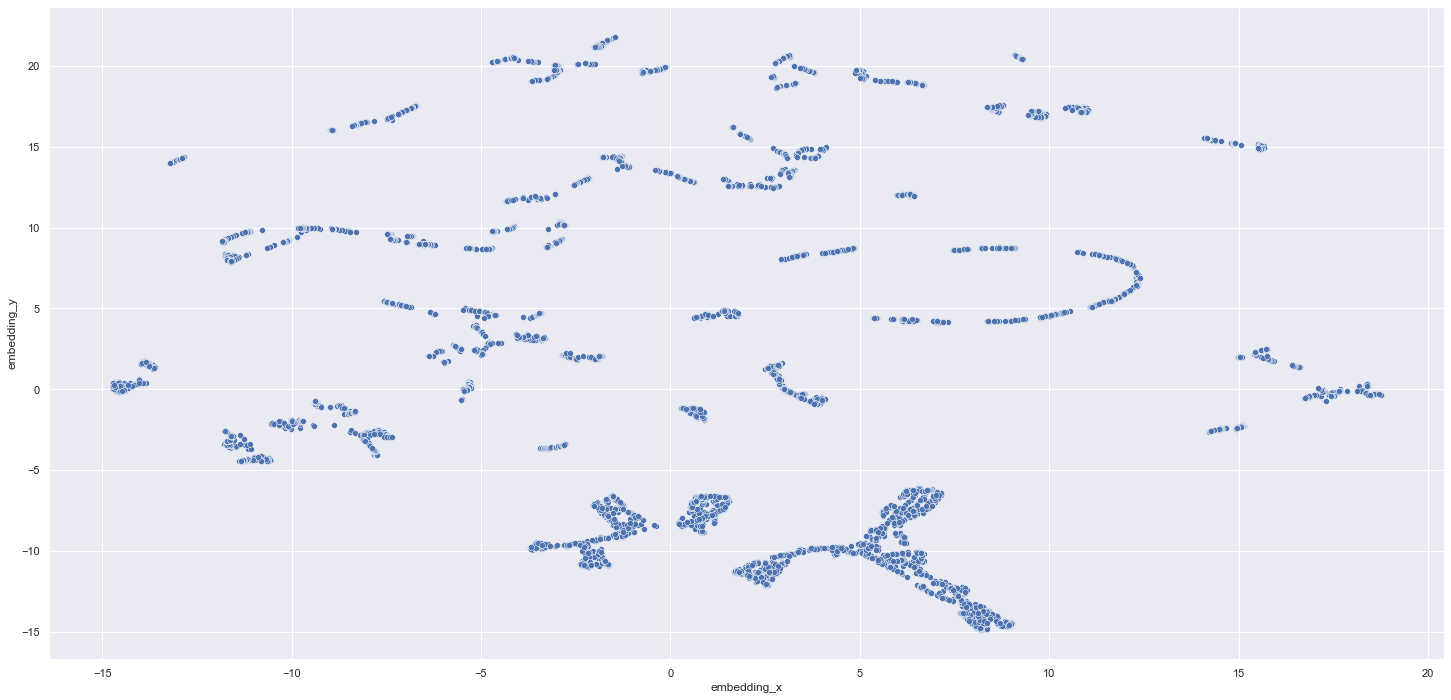

In [50]:
#!pip install llvmlite==0.37.0rc2 --ignore-installed
#!pip install umap-learn
#import umap.umap_ as umap

# UMAP: cluster designed with high dimensionality

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                data= df_umap)

### 4.3.2. t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

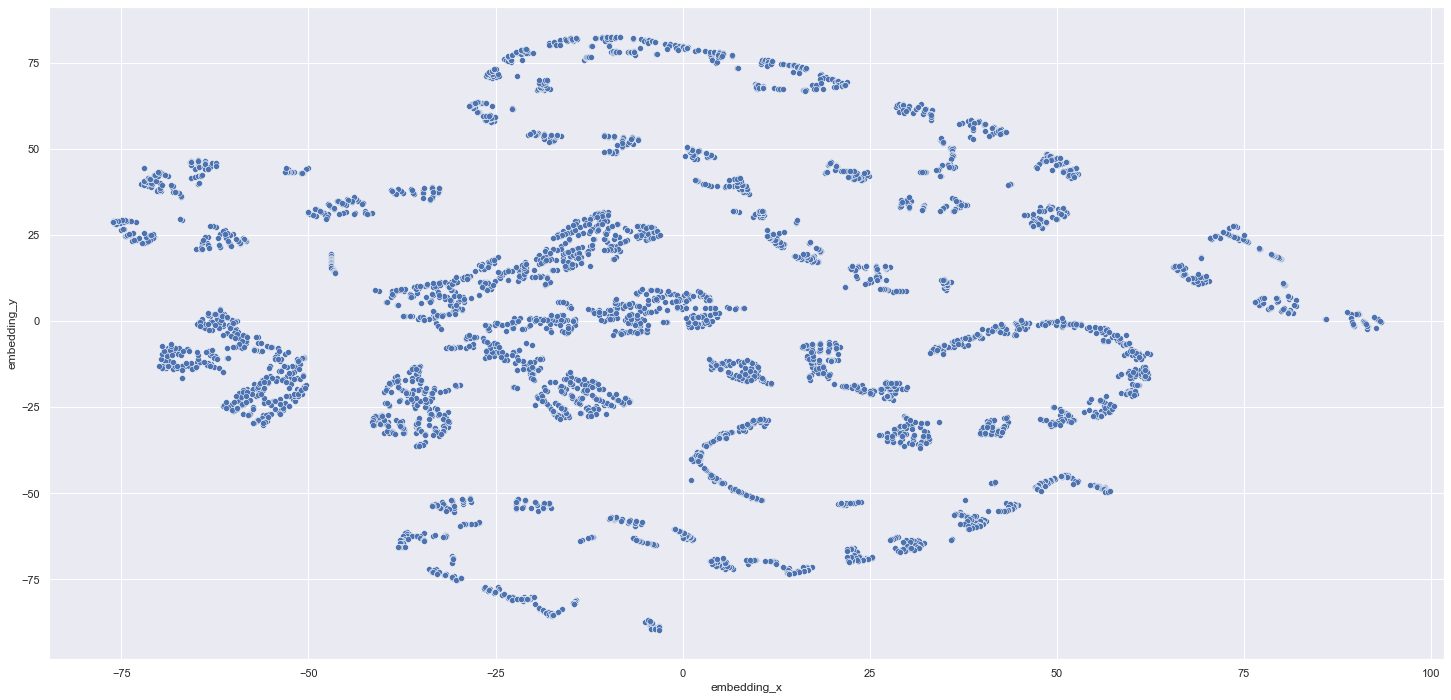

In [51]:
#from sklearn.manifold import TSNE
reducer = mn.TSNE(n_components=2,n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                data= df_tsne)

### 4.3.4. Tree-Based Embedding

In [52]:
 # training dataset
X = df43.drop( columns=['gross_revenue'], axis=1 )
y = df43['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )

# Leaf 
df_leaf = pd.DataFrame( rf_model.apply( X ) )

/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

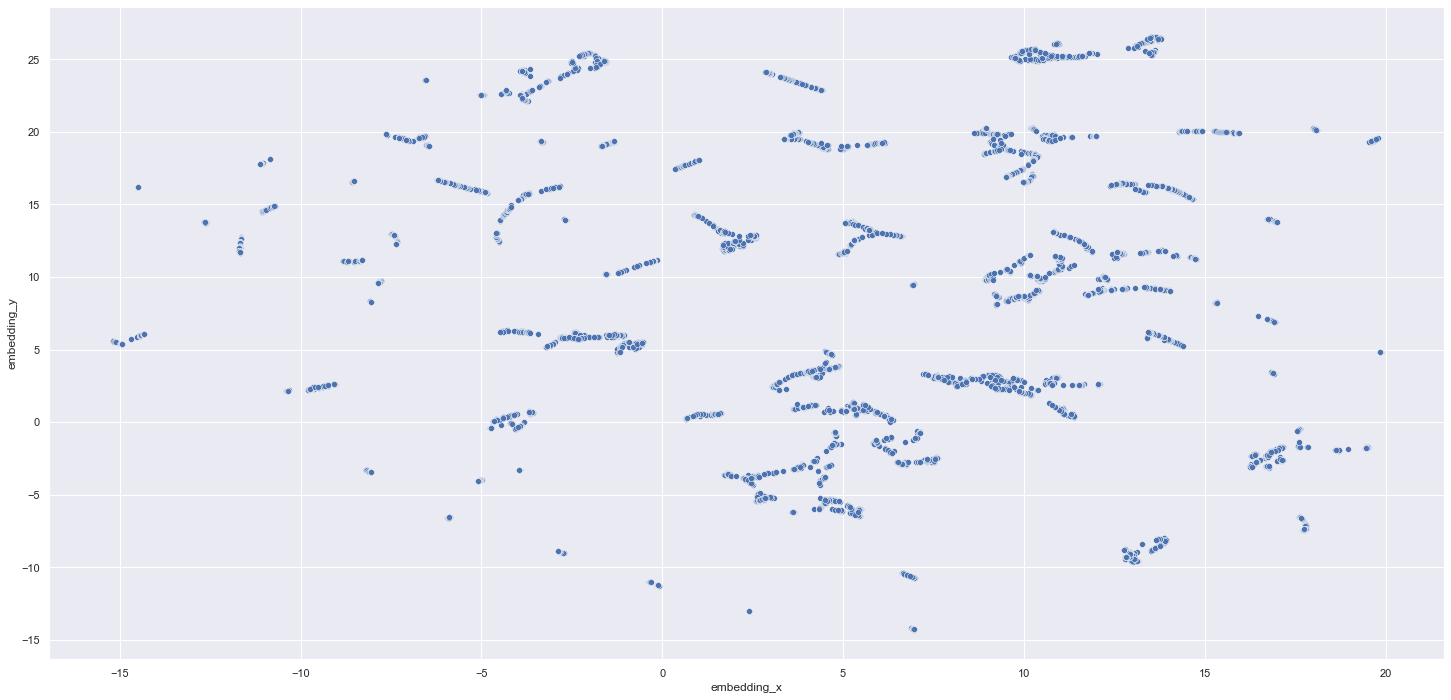

In [53]:
 # Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_tree )

# 5.0. Data Preparation

In [54]:
# Tree-Based Embedding
df5 = df_tree.copy()
df5.to_csv('tree_based_embedding.cdv')

# UMAP Embedding
#df5 = df_umap.copy()

# TSNE Embedding
#df5 = df_tsne.copy()

In [55]:
# Standard Scaler
#from sklearn import preprocessing as pp
#mm = pp.MinMaxScaler()
#ss = pp.StandardScaler()
#rs = pp.RobustScaler()

#df5['gross_revenue']          = mm.fit_transform(df5[['gross_revenue']])
#df5['recency_days']           = mm.fit_transform(df5[['recency_days']])
# df5['quantity_invoices']      = mm.fit_transform(df5[['quantity_invoices']])
# df5['quantity_items']         = mm.fit_transform(df5[['quantity_items']])
#df5['quantity_products']      = mm.fit_transform(df5[['quantity_products']])
# df5['avg_ticket']             = mm.fit_transform(df5[['avg_ticket']])
# df5['avg_recency_days']       = mm.fit_transform(df5[['avg_recency_days']])
#df5['frequency']              = mm.fit_transform(df5[['frequency']])
#df5['quantity_returns']       = mm.fit_transform(df5[['quantity_returns']])
# df5['avg_basket_size']        = mm.fit_transform(df5[['avg_basket_size']])
# df5['avg_unique_basket_size'] = mm.fit_transform(df5[['avg_unique_basket_size']])
    
#variable = 'avg_unique_basket_size'

In [56]:
# Data as is
#print('Min:{} - Max:{}'.format(df5_aux[variable].min(), df5_aux[variable].max()))
#sns.displot(df5_aux[variable]);

In [57]:
# Data Standardization/Rescale
#print('Min:{} - Max:{}'.format(df5[variable].min(), df5[variable].max()))
#sns.displot(df5[variable]);

In [58]:
# BoxPlot
#sns.boxplot(df5_aux[variable]);

# 6.0. Feature Selection

In [59]:
#cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'quantity_products', 'frequency', 'quantity_returns']
#df6 = df5[ cols_selected ].copy()
#df6 = df_tree.copy()

# 7.0. Hyperparameter Fine Tunning

In [60]:
X = df5.copy()

In [61]:
X.head()

,embedding_x,embedding_y
0,3.736267,-3.220681
1,7.023769,-2.743365
2,4.158807,-2.681693
3,13.134467,-8.960883
4,-8.535720,16.597038


In [62]:
#clusters = [2, 3, 4, 5, 6, 7, 8, 9]
clusters = np.arange( 2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

## 7.1. K-Means

In [63]:
from sklearn import metrics as m

In [64]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k, n_init=100, random_state=42 )

    # model training
    kmeans_model.fit( X )

    # model predict
    labels = kmeans_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    kmeans_list.append( sil )

Text(0.5, 1.0, 'Silhouette Score x K')

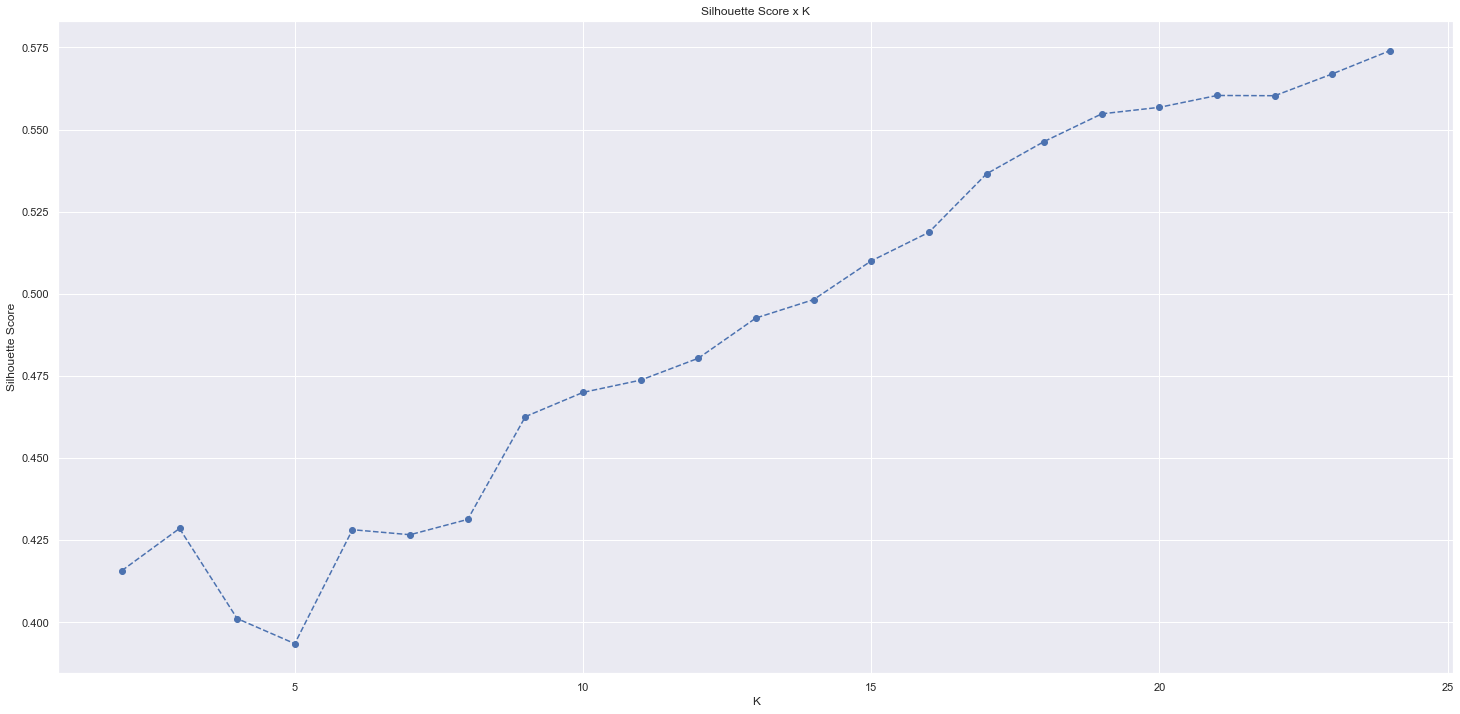

In [65]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K')

## 7.2. GMM

In [66]:
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture( n_components=k, n_init=10, random_state=42 )

    # model training
    gmm_model.fit( X )

    # model predict
    labels = gmm_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    gmm_list.append( sil )

Text(0.5, 1.0, 'Silhouette Score x K')

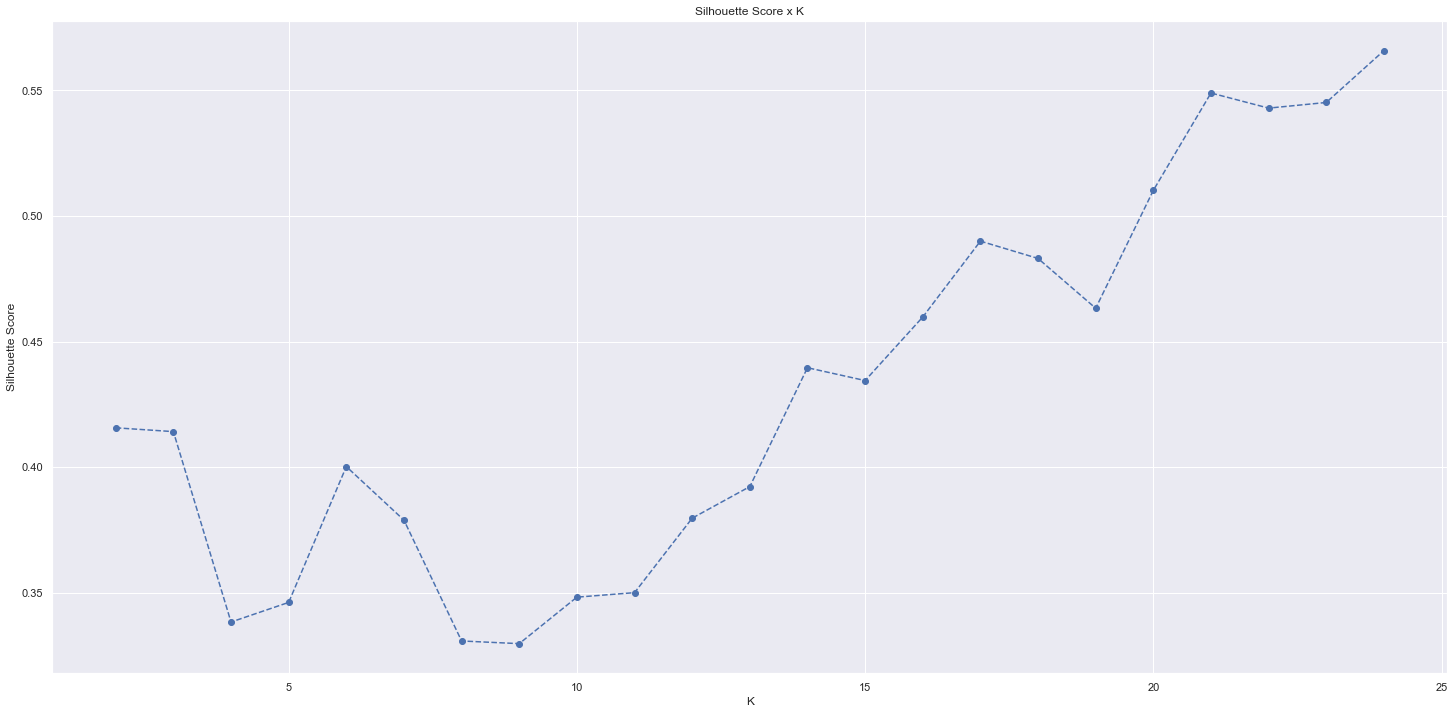

In [67]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K')

## 7.3. Hierarchical Clustering

In [68]:
# from scipy.cluster import hierarchy as hc

# model definition and training
hc_model = hc.linkage(X, 'ward')

In [69]:
#hc.dendrogram(
    #hc_model,
    #leaf_rotation = 90,
    #leaf_font_size=8
#)

#plt.plot()

In [70]:
#hc.dendrogram(
    #hc_model,
    #truncate_mode='lastp',
    #p=12,
    #leaf_rotation = 90,
   # leaf_font_size=8,
    #show_contracted=True
#)

#plt.plot()

### 7.3.1. HClustering Silhouette Score

In [71]:
hc_list = []
for k in clusters:
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # metrics
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    hc_list.append( sil )

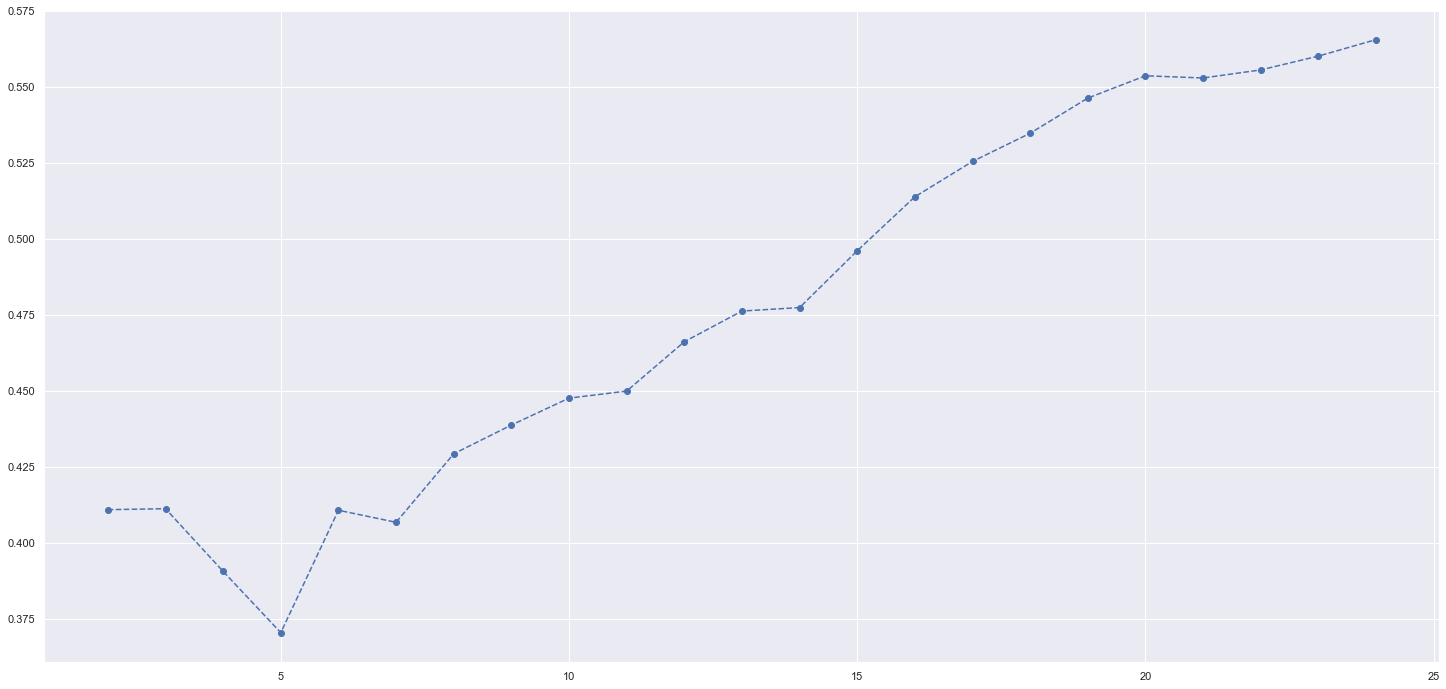

In [72]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')

## 7.5. Results

In [73]:
## 7.5. Results - Tree Based Embedding

df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list}
).T

df_results.columns = clusters
df_results.style.highlight_max( color='lightgreen', axis=1 )

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.415729,0.428559,0.401135,0.393502,0.428187,0.426653,0.431322,0.462600,0.469980,0.473712,0.480374,0.492620,0.498221,0.510003,0.518697,0.536505,0.546346,0.554769,0.556751,0.560359,0.560282,0.566934,0.574007
GMM,0.415661,0.414148,0.338358,0.346173,0.400231,0.378915,0.330823,0.329757,0.348260,0.350053,0.379694,0.392263,0.439578,0.434469,0.459753,0.489959,0.483066,0.463250,0.510170,0.548913,0.542900,0.545147,0.565781
HC,0.410910,0.411235,0.390614,0.370469,0.410723,0.406765,0.429285,0.438747,0.447596,0.449915,0.466145,0.476238,0.477379,0.496064,0.513824,0.525450,0.534723,0.546276,0.553617,0.552892,0.555546,0.560094,0.565506


In [ ]:
 ## 7.6. Results - UMAP Embedding

df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list}
).T

df_results.columns = clusters
df_results.style.highlight_max( color='lightgreen', axis=1 )

In [ ]:
## 7.7. Results - TSNE Embedding

df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list}
).T

df_results.columns = clusters
df_results.style.highlight_max( color='lightgreen', axis=1 )

# 8.0. Model Training

## 8.1. K-Means - GMM

In [74]:
 ## model definition
k = 9
kmeans = c.KMeans( init='random', n_clusters=k, random_state=42  )
#
## model training
kmeans.fit( X )
#
## clustering
labels = kmeans.labels_

In [75]:
# model definition
#gmm_model = mx.GaussianMixture( n_components=k,n_init=300, random_state=42 )

# model training
#gmm_model.fit( X )

# model predict
#labels = gmm_model.predict( X )

## 8.2. Cluster Validation

In [76]:
# WSS (Within- cluster sum of square)
#print('WSS value: {}'.format( kmeans.inertia_))

# SS (Silhouette Score)
print('SS value: {}'.format (m.silhouette_score(X, labels, metric='euclidean')))

SS value: 0.4538723826408386


# 9.0. Cluster Analysis

In [77]:
X.head()

,embedding_x,embedding_y
0,3.736267,-3.220681
1,7.023769,-2.743365
2,4.158807,-2.681693
3,13.134467,-8.960883
4,-8.535720,16.597038


In [78]:
df9 = X.copy()
df9['cluster'] = labels

## 9.1. Visualization Inspection

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

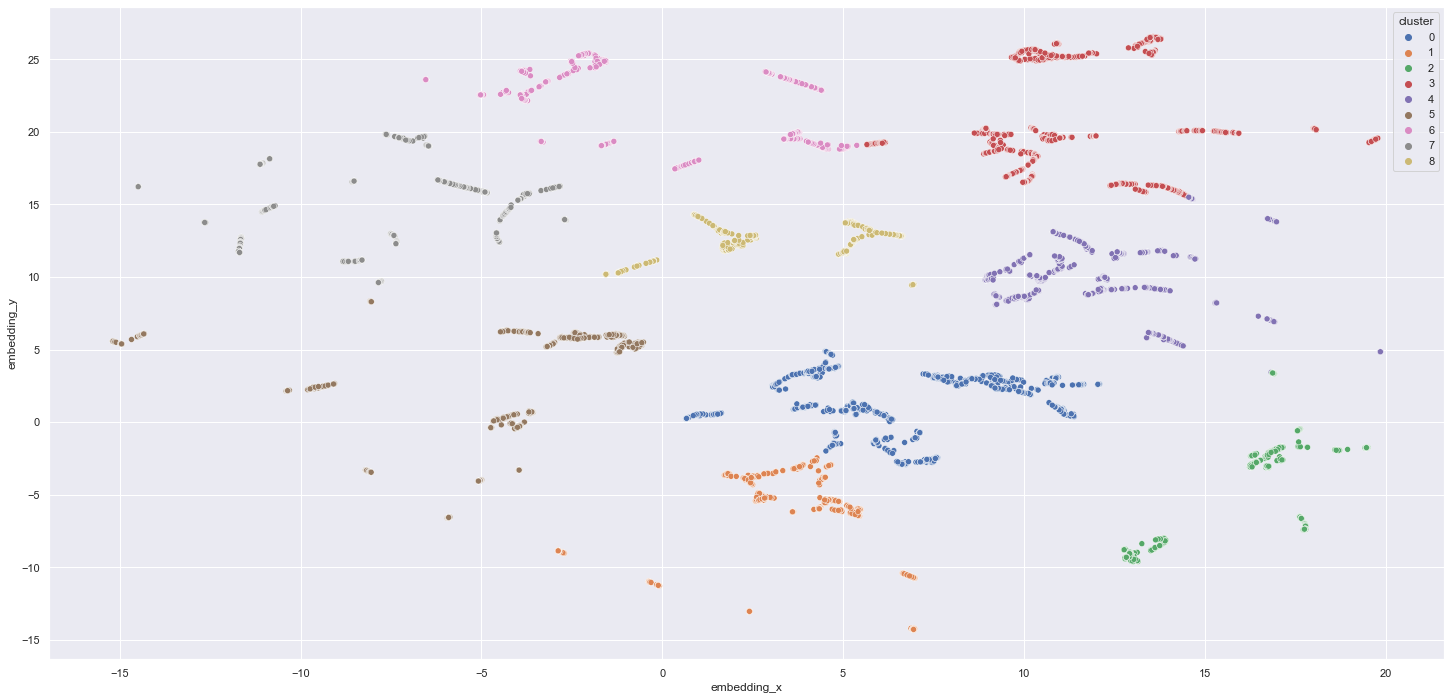

In [79]:
#from plotly import express as px
#fig = px.scatter_3d(df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

#visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
#visualizer.fit(X)
#viausalizer.finalize()

sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep')

## 9.2. 2d plot

In [80]:
#df_viz = df9.drop( columns = 'customer_id', axis=1)
#sns.pairplot(df_viz, hue='cluster')

## 9.3. UMAP 


In [81]:
#!pip install llvmlite==0.37.0rc2 --ignore-installed
#!pip install umap-learn
#import umap.umap_ as umap

# UMAP: cluster designed with high dimensionality

#reducer = umap.UMAP(n_neighbors=90, random_state=42)
#embedding = reducer.fit_transform(X)

#embedding
#df_viz['embedding_x'] = embedding[:, 0]
#df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
#sns.scatterplot(x='embedding_x',
                #y='embedding_y',
                #hue='cluster',
                #palette=sns.color_palette('hls',
                                          #n_colors=len(
                                              #df_viz['cluster'].unique())),
                #data=df_viz)

## 9.2. Cluster Profile

In [82]:
df92 = df4[cols_selected].copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,quantity_products,frequency,quantity_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,1
1,13047,3232.59,56.0,171.0,0.028302,35.0,0
2,12583,6705.38,2.0,232.0,0.040323,50.0,1
3,13748,948.25,95.0,28.0,0.017921,0.0,2
4,15100,876.00,333.0,3.0,0.073171,22.0,7


In [84]:
# Number of customer
df_cluster = df92[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

# Avg gross revenue
df_avg_gross_revenue = df92[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how = 'inner', on ='cluster')

# Avg recency days
df_avg_recency_days = df92[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how = 'inner', on ='cluster')

# Quantity Products
df_avg_quantity_products = df92[['quantity_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_quantity_products, how = 'inner', on ='cluster')

# Frequency
df_avg_frequency = df92[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_frequency, how = 'inner', on ='cluster')

# Quantity Returns
df_avg_quantity_returns = df92[['quantity_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_quantity_returns, how = 'inner', on ='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,quantity_products,frequency,quantity_returns
0,0,1063,18.665496,2448.618081,73.834431,167.054563,0.321776,10.876764
1,1,495,8.691835,8311.144384,77.143434,399.769697,0.369529,289.838384
2,2,429,7.532924,1039.901655,76.874126,56.720280,0.133748,4.090909
3,3,829,14.556629,678.087660,130.266586,32.053076,0.583568,5.570567
4,4,714,12.537313,993.200714,160.959384,30.882353,0.962599,6.331933
5,5,632,11.097454,1491.713085,114.318038,74.799051,0.400877,9.411392
6,6,614,10.781387,428.006417,107.506515,13.482085,0.532917,1.565147
7,7,501,8.797191,265.294192,170.455090,6.353293,0.702228,7.291417
8,8,418,7.339772,794.000167,166.698565,48.461722,1.031235,3.791866


**Cluster 1: Insiders**

**Cluster 0: More Products**

**Cluster 5: Spend Money**

**Cluster 2: Even More Products**

**Cluster 4: Spend More Money**

**Cluster 8: Less Days**

**Cluster 3: Less 1k**

**Cluster 6: Stop Returners**

**Cluster 7: More Buy**


# 10.0. EAD

### 10.1. Mindmap Hipothesis

In [85]:
df10 = df92.copy()
df10.head()

,customer_id,gross_revenue,recency_days,quantity_products,frequency,quantity_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,1
1,13047,3232.59,56.0,171.0,0.028302,35.0,0
2,12583,6705.38,2.0,232.0,0.040323,50.0,1
3,13748,948.25,95.0,28.0,0.017921,0.0,2
4,15100,876.00,333.0,3.0,0.073171,22.0,7


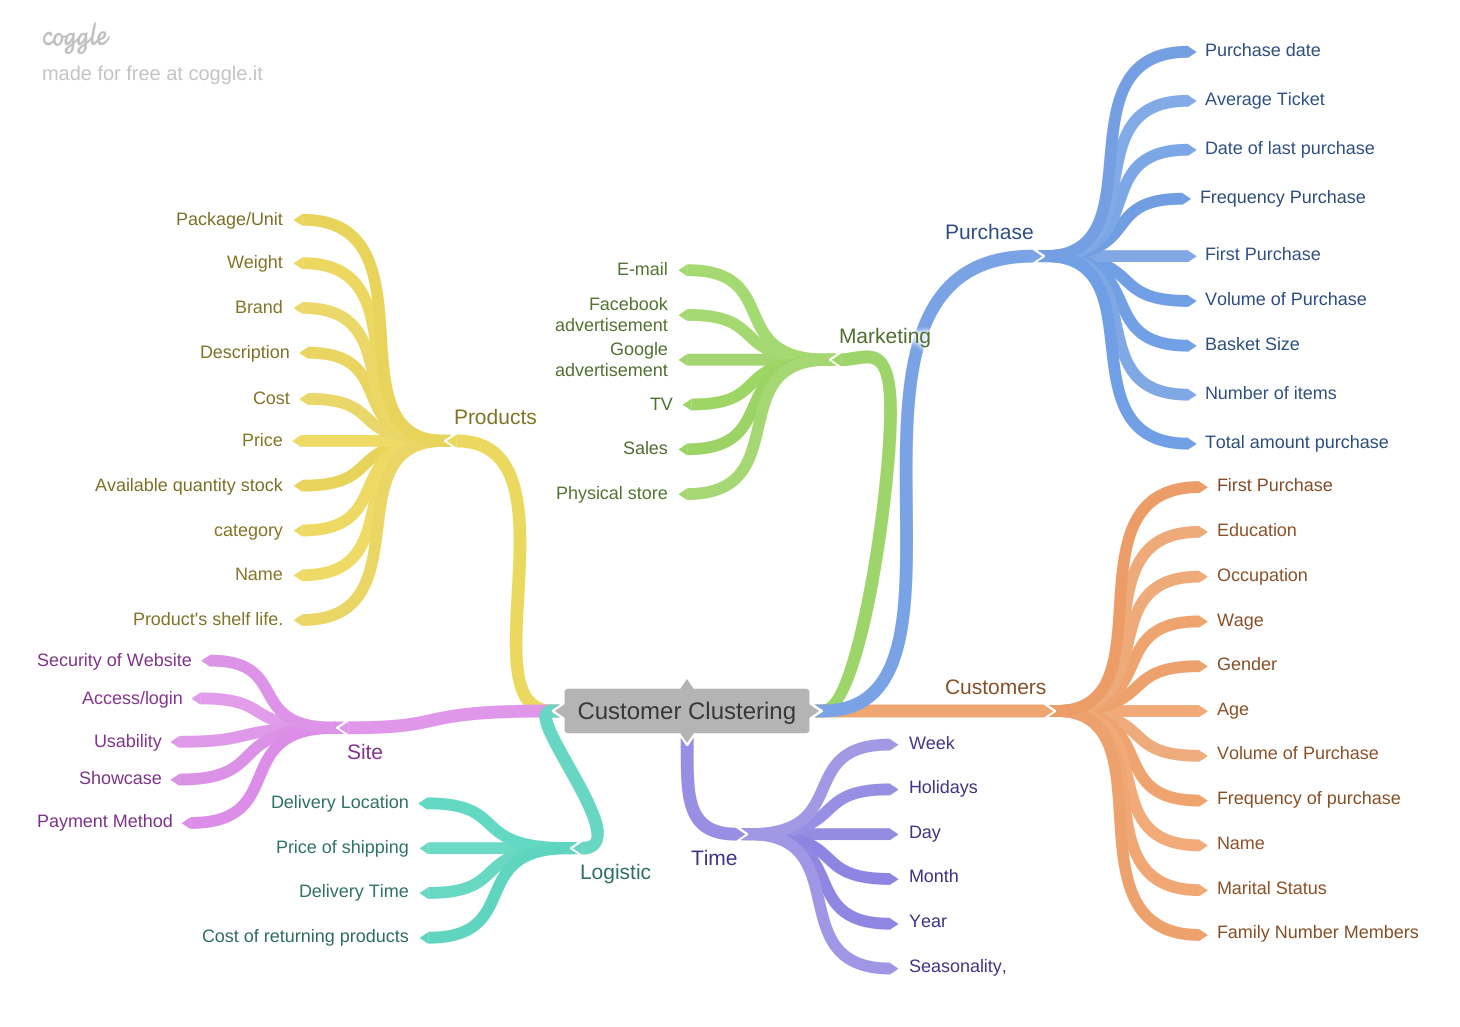

In [86]:
Image('/Users/anaotavio/Documents/repos/insiders_clustering/img/mindmap.png')

### 10.2. Business Hypothesis

#### Purchase Hypotheses

**1.**Insiders customers use a credit card for 80% of their purchases.

This assumption has no value because there is no information about the type of payment in the dataset.

**2.** Insiders customers have an average ticket of 10% over the More Products cluster.

This assumption has no feature in the df92.

**3.** Insiders customers have a basket size above 5 products.

This assumption has no feature in the df92.

**4. Insiders cluster has a volume of product purchases above 10% of total purchases.**

**5. Insiders cluster has a volume of gross revenue above 10% of total purchases.**

**6. Insider cluster has an average number of returns below the average of total customers..**

**7. The median revenue by cluster Insiders is 10% above than overall median revenue.**

**8. The GMV of cluster Insiders is concentrated in the 3rd quartile.**

### 10.3. Final Hypothesis list

**4. Insiders cluster has a volume of product purchases above 10% of total purchases.**

**5. Insiders cluster has a volume of gross revenue above 10% of total purchases.**

**6. Insider cluster has an average number of returns below the average of total customers..**

**7. The median revenue by cluster Insiders is 10% above than overall median revenue.**

**8. The GMV of cluster Insiders is concentrated in the 3rd quartile.**

### 10.4. Hypotheses Validation

**H1:** Insiders cluster has a volume of product purchases above 10% of total purchases.

**True:** Insiders cluster has a product purchase volume of 38%

In [89]:
# sum of Insiders quantity products
df_sales_insiders = df10.loc[df10['cluster']==1, 'quantity_products'].sum()
df_sales_total = df10.loc[:, 'quantity_products'].sum()

# sum of total quantity products
print('% Sales Insiders: {:.2f}%'.format(100*df_sales_insiders / df_sales_total))

% Sales Insiders: 37.52%


**H2:** Insiders cluster has a volume of gross revenue above 10% of total purchases.

**True:** Insiders cluster has GMV colume of 41%.

In [88]:
# gmv: gross margin value
# sum of Insiders quantity products
df_gmv_insiders = df10.loc[df10['cluster']==1, 'gross_revenue'].sum()
df_gmv_total = df10.loc[:, 'gross_revenue'].sum()

# sum of total quantity products
print('% GMV: {:.2f}%'.format(100*df_gmv_insiders / df_gmv_total))
    

% GMV: 40.71%


**H3:** Insider cluster has an average number of returns below the average of total customers.
    
**False:** Insider cluster has an average number of returns above the average of total customers.

In [90]:
# average returns Insiders
df_avg_return_insiders = df10.loc[df10['cluster']==1, 'quantity_returns'].mean()

# average total returns
df_average_return_all = df10['quantity_returns'].mean()

print('Avg Return Insiders:{} vs Avg Return All:{}'.format(np.round(df_avg_return_insiders, 0), np.round(df_average_return_all, 0) ))

Avg Return Insiders:290.0 vs Avg Return All:31.0


**H4:** The median revenue by cluster Insiders is 10% above than overall median revenue.
    
**True:** AThe median revenue is 496% above the average.

In [92]:
# GMV Insiders median
df_median_gmv_insiders = df10.loc[df10['cluster']==1, 'gross_revenue'].median()

# GMV Total median
df_median_gmv_total = df10['gross_revenue'].median()

gmv_diff = (df_median_gmv_insiders - df_median_gmv_total)/df_median_gmv_total
print('Median Diff: {:.2f}%'.format(100*gmv_diff))

Median Diff: 496.43%


**H5:** The GMV of cluster Insiders is concentrated in the 3rd quartile.

**False:** The GMV of cluster Insiders is concentrated in the 1rd quartile


In [93]:
np.percentile(df10.loc[df10['cluster']==1, 'gross_revenue'], q=0.1)

3.1476

In [94]:
np.percentile(df10.loc[df10['cluster']==1, 'gross_revenue'], q=0.9)

15.43206000000001

<AxesSubplot:xlabel='gross_revenue'>

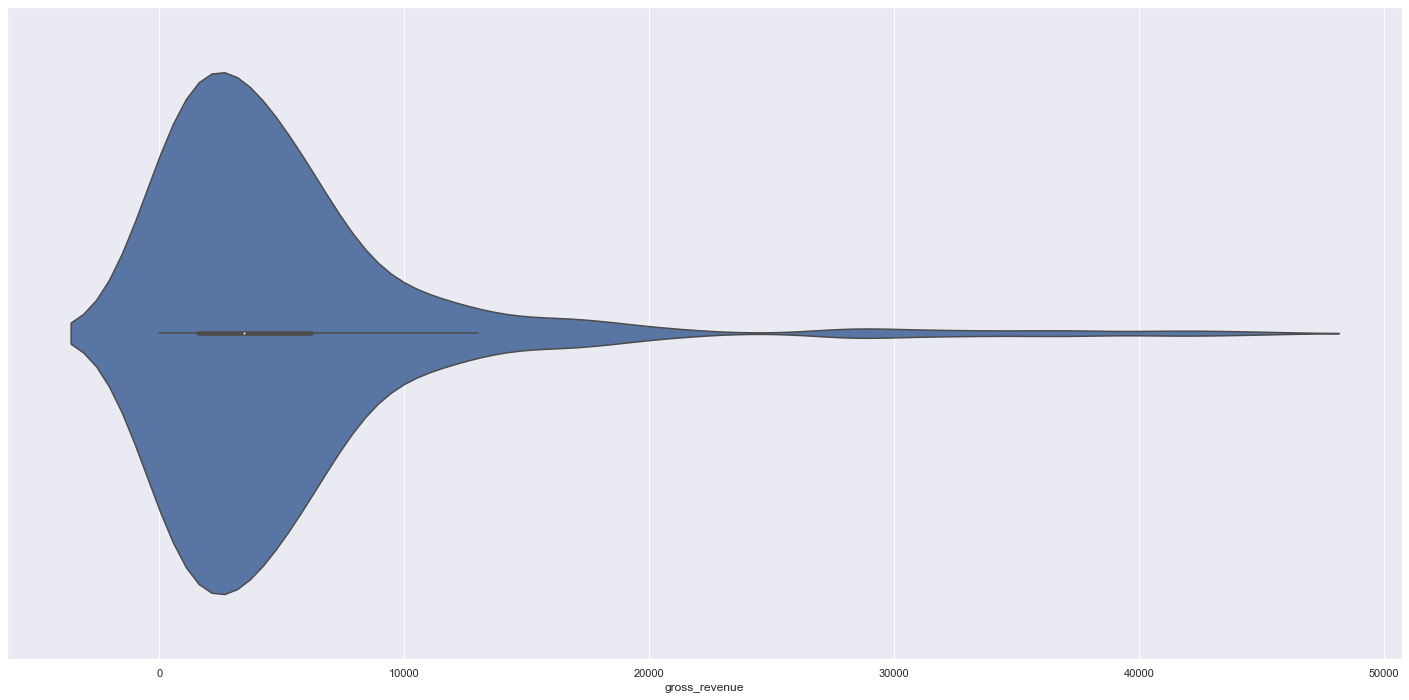

In [95]:
df_aux = df10.loc[(df10['cluster'] == 1) & (df10['gross_revenue'] < 50000 ), 'gross_revenue'];
sns.violinplot( x=df_aux )

### 10.5. Answers Framework

#### Business Questions

**1. Who are the customers eligible to join the program?**

In [96]:
insiders = df10.loc[df10['cluster']==1, 'customer_id']

**2. How many customers will be part os this group?**

In [97]:
insiders.size

495

**3. What are the main characteristics of these customers?**

**Cluster Insider**
- Number of customers: 495 (25,26% of customers)
- Average Recency: 77 days
- Average Purchase: 499 
- Avarage Revenue: 8311.14 dollars
- Frequency of purchases: 0.37 products/day
- Quantity of Returns: 290

**4. What is the contribution percentage revenue from Insiders?**

In [98]:
# gmv: gross margin value
df_gmv_insiders = df10.loc[df10['cluster']==1, 'gross_revenue'].sum()
df_gmv_total = df10.loc[:, 'gross_revenue'].sum()

print('% GMV from Insiders: {:.2f}%'.format(100*df_gmv_insiders / df_gmv_total))

% GMV from Insiders: 40.71%


**5. What is the group's revenue expectation for the coming months?**

**6. What are the condictions for select customers to join Insiders?**

**7. What are the condictions for removing Insiders customers?**

**8. What is the guarantee that the Insiders program is better than the rest of the base?**

**9. What actions can the marketing team take to increase revenue?**

# 11.0. Deploy to Production